In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ratings/ratings_Beauty.csv


In [2]:
import pandas as pd
data=pd.read_csv('/kaggle/input/amazon-ratings/ratings_Beauty.csv')

In [3]:
data.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
data.shape

(2023070, 4)

In [5]:
dat=data.copy()

In [6]:
dat.groupby('ProductId')['Rating']

In [7]:
dat.groupby('ProductId').count()

,UserId,Rating,Timestamp
ProductId,,,
0205616461,1,1,1
0558925278,2,2,2
0733001998,1,1,1
0737104473,1,1,1
0762451459,1,1,1
...,...,...,...
B00LORWRJA,1,1,1
B00LOS7MEE,1,1,1
B00LP2YB8E,1,1,1


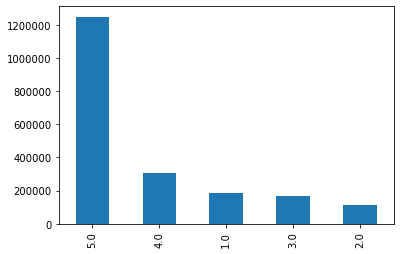

In [8]:
dat['Rating'].value_counts().plot.bar()


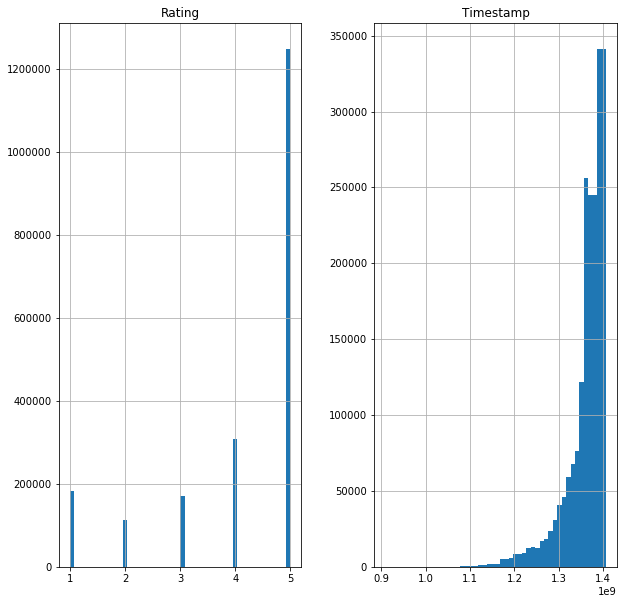

In [9]:
#histogram of entire dataset objects are not shown only int n float
import matplotlib.pyplot as plt
dat.hist(bins=50,figsize=(10,10))
plt.show()

In [10]:
dat[dat.isnull().any(axis=1)]

,UserId,ProductId,Rating,Timestamp


In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [12]:
print(np.unique(dat['Rating']))

[1. 2. 3. 4. 5.]


In [13]:
print(np.unique(dat['ProductId']))

['0205616461' '0558925278' '0733001998' ... 'B00LP2YB8E' 'B00LPVG6V0'
 'B00LU0LTOU']


In [14]:
print(dat['UserId'].value_counts())

A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A2SNAHZW21M9OS      1
A3R6ZDB5EQ8DYZ      1
A2AG1J11CBBXGL      1
AYX0X5OPCE5EL       1
A8DOQTRM02JP2       1
Name: UserId, Length: 1210271, dtype: int64


In [15]:
print(dat['Rating'].value_counts())

5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: Rating, dtype: int64


In [16]:
print(dat['ProductId'].value_counts())

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B006J0CE8G       1
B004C1U0PI       1
B001CYCRZ4       1
B000WZSZ82       1
B00C7HBLJ8       1
Name: ProductId, Length: 249274, dtype: int64


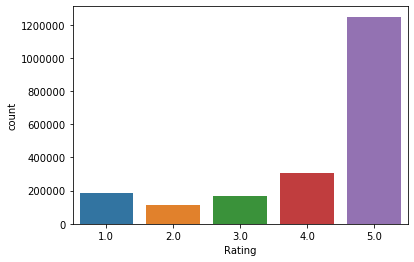

In [17]:
#plotting caterogical data
import seaborn as sns
sns.countplot(x='Rating',data=dat);

In [18]:
#y=pd.DataFrame(pd.crosstab(index=dat['Rating'],columns=dat['ProductId']))

In [19]:
dat.groupby('ProductId')['Rating'].count()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
             ..
B00LORWRJA    1
B00LOS7MEE    1
B00LP2YB8E    1
B00LPVG6V0    1
B00LU0LTOU    1
Name: Rating, Length: 249274, dtype: int64

In [20]:
#to store the data a dataframe is created see above no col/result is stored
x=pd.DataFrame(dat.groupby('ProductId')['Rating'].count())

In [21]:
x

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
...,...
B00LORWRJA,1
B00LOS7MEE,1
B00LP2YB8E,1


In [22]:
#x = new df has 2 col rating n product id it is sort of crosstab stored in df
new=x.sort_values('Rating',ascending=False)

In [23]:
new.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


In [24]:
#sns.barplot('ProductId','Rating',data=new.head(10),palette='Set1')


In [25]:
#sns.factorplot('ProductId','Rating',data=new.head(10),palette='Set1')


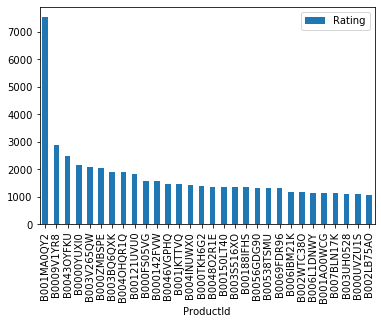

In [26]:
new.head(30).plot(kind = "bar")


In [27]:
dat.groupby('Rating')['ProductId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: ProductId, dtype: int64

In [28]:
m=pd.DataFrame(dat.groupby('Rating')['ProductId'].count())

In [29]:
m

,ProductId
Rating,
1.0,183784
2.0,113034
3.0,169791
4.0,307740
5.0,1248721


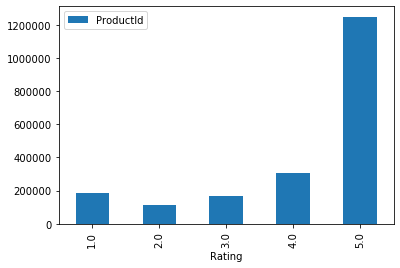

In [30]:
m.plot(kind = "bar")


In [31]:
#n=pd.crosstab(index=(dat['Rating']==5.0),columns=dat['ProductId'])


In [32]:
# here we grouped on base of product id and counted all other attributes like ratings for each group of product id
# i want to group in trems of ratings like rating 5 received product id will form a new group,could not do that

In [33]:
#CONTENT -BASED FILTERING
dat.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [34]:
dat.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [35]:
#taking subset of data
dat1=dat.head(10000)

In [36]:
#mean rating is 4.14 
dat1.groupby('ProductId').mean()

,Rating,Timestamp
ProductId,,
0205616461,5.000000,1.369699e+09
0558925278,4.000000,1.380067e+09
0733001998,4.000000,1.382573e+09
0737104473,1.000000,1.274227e+09
0762451459,5.000000,1.404518e+09
...,...,...
B000052YPU,5.000000,1.257811e+09
B000052YPV,4.750000,1.270307e+09
B000052YPY,4.777778,1.302643e+09


In [37]:
#mean rating per movie (grouped by movie)
rating=pd.DataFrame(dat1.groupby('ProductId')['Rating'].mean())

In [38]:
rating

,Rating
ProductId,
0205616461,5.000000
0558925278,4.000000
0733001998,4.000000
0737104473,1.000000
0762451459,5.000000
...,...
B000052YPU,5.000000
B000052YPV,4.750000
B000052YPY,4.777778


In [39]:
#count number of rating per product id and store result in a new col (number of ratings)the new created ratings dataframe
rating['number_of_rating']=dat1.groupby('ProductId')['Rating'].count()

In [40]:
rating

,Rating,number_of_rating
ProductId,,
0205616461,5.000000,1
0558925278,4.000000,2
0733001998,4.000000,1
0737104473,1.000000,1
0762451459,5.000000,1
...,...,...
B000052YPU,5.000000,2
B000052YPV,4.750000,16
B000052YPY,4.777778,9


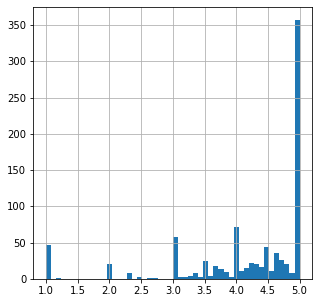

In [41]:
#plot hist for both the cols (no of rating) and (mean of rating) for each movie using above dataframe
import matplotlib.pyplot as plt
rating['Rating'].hist(bins=50,figsize=(5,5))
plt.show()


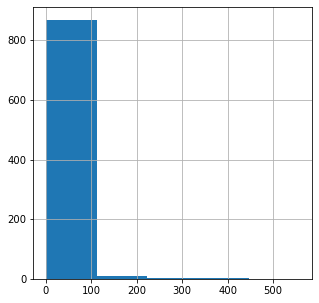

In [42]:
rating['number_of_rating'].hist(bins=5,figsize=(5,5))


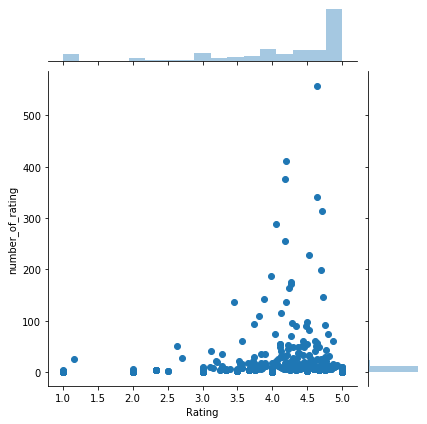

In [43]:
#relationship between (no of rating) and (mean rating)
import seaborn as sns
sns.jointplot(x='Rating', y='number_of_rating', data=rating)


so there is a +ve corr between number of rating and mean of rating as avg rating increases;no of rating increases or as 
no of rating increases the average rating inceases


In [44]:
#item_matrix=dat.pivot_table(index='UserId',columns='ProductId',values='Rating')
#taking subset of data
#dat1=dat.head(10000)
#couting no of rated movies 

In [45]:
item_matrix=dat1.pivot_table(index='UserId',columns='ProductId',values='Rating',fill_value=0)

In [46]:
item_matrix[1:2]

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#checking most rated movie i.e. higher count from rating dataframe
rating.sort_values('number_of_rating',ascending=False).head(10)


,Rating,number_of_rating
ProductId,,
B00004TUBL,4.634409,558
B000052YM7,4.196602,412
B000050B6U,4.175066,377
B000052YP6,4.642229,341
B000052YMR,4.706070,313
B000052XZP,4.059028,288
B000052YOL,4.188235,255
B000052YOR,4.530702,228
B000052YJH,4.702020,198


product id # B00004TUBL  and #B000052YM7 are most rated lets check their rel with other product i.e. cecking similarity of top rated prod with other products
lets check the rating of all users for these two products using the pivot table.and create two new df for this.

In [48]:
#choosing two cols (prod id) from item matrix n creating two new df
prod1=item_matrix['B00004TUBL']
prod2=item_matrix['B000052YM7']

In [49]:
prod1.head()

UserId
A00205921JHJK5X9LNP42    0
A024581134CV80ZBLIZTZ    0
A03056581JJIOL5FSKJY7    0
A03099101ZRK4K607JVHH    0
A0505229A7NSH3FRXRR4     0
Name: B00004TUBL, dtype: int64

In [50]:
prod2.head()

UserId
A00205921JHJK5X9LNP42    0
A024581134CV80ZBLIZTZ    0
A03056581JJIOL5FSKJY7    0
A03099101ZRK4K607JVHH    0
A0505229A7NSH3FRXRR4     0
Name: B000052YM7, dtype: int64

In [51]:
prod1.shape

(9697,)

In [52]:
similar_to_prod1 = item_matrix.corrwith(prod1)


In [53]:
similar_to_prod1.head()

ProductId
0205616461   -0.002466
0558925278   -0.003383
0733001998   -0.002466
0737104473   -0.002466
0762451459   -0.002466
dtype: float64

In [54]:
similar_to_prod2 = item_matrix.corrwith(prod2)


In [55]:
similar_to_prod1_df=pd.DataFrame(similar_to_prod1,columns=['Correlation'])
similar_to_prod2_df=pd.DataFrame(similar_to_prod2,columns=['Correlation'])

In [56]:
similar_to_prod1_df.head()

,Correlation
ProductId,
0205616461,-0.002466
0558925278,-0.003383
0733001998,-0.002466
0737104473,-0.002466
0762451459,-0.002466


In [57]:
similar_to_prod1_df=similar_to_prod1_df.join(rating['number_of_rating'])


In [58]:
similar_to_prod1_df.head()

,Correlation,number_of_rating
ProductId,,
0205616461,-0.002466,1
0558925278,-0.003383,2
0733001998,-0.002466,1
0737104473,-0.002466,1
0762451459,-0.002466,1


In [59]:
similar_to_prod2_df=similar_to_prod2_df.join(rating['number_of_rating'])


In [60]:
similar_to_prod2_df.head()

,Correlation,number_of_rating
ProductId,,
0205616461,-0.002053,1
0558925278,-0.002817,2
0733001998,-0.002053,1
0737104473,-0.002053,1
0762451459,-0.002053,1


In [61]:
similar_to_prod2_df[similar_to_prod2_df['number_of_rating'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_rating
ProductId,,
B000052YM7,1.000000,412
B000052YM4,0.090914,176
B000052YM3,0.019851,116
B000052WYD,-0.017491,143
B000052WYN,-0.020257,110
B00004TMFE,-0.022095,137
B000052YJM,-0.023132,136
B00004U9UY,-0.024653,146
B000052YOL,-0.024949,255


In [62]:
similar_to_prod1_df[similar_to_prod1_df['number_of_rating'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_rating
ProductId,,
B00004TUBL,1.000000,558
B00004TUBV,-0.014734,171
B000052WYN,-0.024329,110
B000052YM3,-0.025472,116
B00004TMFE,-0.026536,137
B000052YJM,-0.027783,136
B000052WYD,-0.028125,143
B00004U9UY,-0.029609,146
B000052XW5,-0.030541,163


In [63]:
#CORR IS NOT GOOD SINCE WE TOOK A SUBSET NOT TAKING ACCOUNT OF MOST HIGHLY-RATED (COUNT) OF PRODUCTS

In [64]:
dat.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [65]:
rating1=pd.DataFrame(dat.groupby('ProductId')['Rating'].mean())

In [66]:
rating1['number_of_rating']=dat.groupby('ProductId')['Rating'].count()

In [67]:
rating1.head()

,Rating,number_of_rating
ProductId,,
0205616461,5.0,1
0558925278,4.0,2
0733001998,4.0,1
0737104473,1.0,1
0762451459,5.0,1


In [68]:
new_df=rating1.sort_values('number_of_rating',ascending=False).head(10000)

In [69]:
new_df.shape

(10000, 2)

In [70]:
new_df.head()

,Rating,number_of_rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088


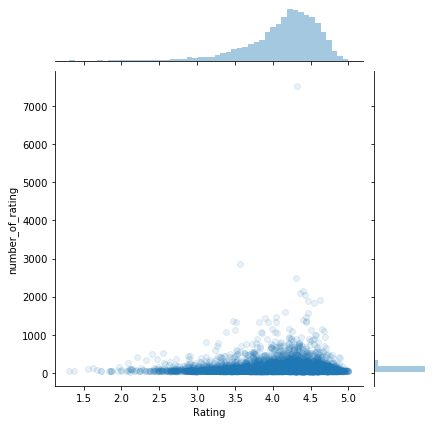

In [71]:
sns.jointplot(x='Rating', y='number_of_rating', data=new_df,alpha=0.1)


higher correlated values get darkened due to parameter (alpha)**

below,MERGING TWO DF; NEW_DF AND DAT TO GET HIGH RATED ITEMS

In [72]:
#new_df=new_df.join(dat['UserId'])
train_merged= pd.merge(new_df, dat, on='ProductId')



In [73]:
train_merged.head()

,ProductId,Rating_x,number_of_rating,UserId,Rating_y,Timestamp
0,B001MA0QY2,4.321386,7533,AUTN6F1IC21UN,5.0,1405382400
1,B001MA0QY2,4.321386,7533,A78NJCPO233DF,5.0,1405987200
2,B001MA0QY2,4.321386,7533,A23PDIB6LC6FPZ,5.0,1405382400
3,B001MA0QY2,4.321386,7533,A38IWWG4R8AXKM,5.0,1405296000
4,B001MA0QY2,4.321386,7533,A1Y7QLOC7679XZ,5.0,1405728000


In [74]:
print(len(np.unique(train_merged['ProductId'])))

10000


In [75]:
x=train_merged.head(10000)

In [76]:
print(np.unique(x['ProductId']))

['B0009V1YR8' 'B001MA0QY2']


lets check the top rated product id from rating 2 and select all rows for those product ids from train-merged df

In [77]:
li=['B001MA0QY2','B0009V1YR8']
final=train_merged[train_merged['ProductId'].isin(li)]

In [78]:
final.head()

,ProductId,Rating_x,number_of_rating,UserId,Rating_y,Timestamp
0,B001MA0QY2,4.321386,7533,AUTN6F1IC21UN,5.0,1405382400
1,B001MA0QY2,4.321386,7533,A78NJCPO233DF,5.0,1405987200
2,B001MA0QY2,4.321386,7533,A23PDIB6LC6FPZ,5.0,1405382400
3,B001MA0QY2,4.321386,7533,A38IWWG4R8AXKM,5.0,1405296000
4,B001MA0QY2,4.321386,7533,A1Y7QLOC7679XZ,5.0,1405728000


In [79]:
final.shape

(10402, 6)

now repeat everything as earlier

In [80]:
item_matrix2=final.pivot_table(index='UserId',columns='ProductId',values='Rating_x')

In [81]:
#choosing two cols (prod id) from item matrix n creating two new df
prod1=item_matrix2['B001MA0QY2']
prod2=item_matrix2['B0009V1YR8']

In [82]:
prod1.head(5)

UserId
A00328401T70RFN4P1IT6    4.321386
A01895041IWQIA3MJC6EW    4.321386
A03236882LUP4ARMDDMXU    4.321386
A04144222X0RY2FEWAY10    4.321386
A060829128ICJA0NFDK51    4.321386
Name: B001MA0QY2, dtype: float64

In [83]:
similar_to_prod1 = item_matrix2.corrwith(prod1)
similar_to_prod2 = item_matrix2.corrwith(prod2)



In [84]:
similar_to_prod1_df=pd.DataFrame(similar_to_prod1,columns=['Correlation'])
similar_to_prod2_df=pd.DataFrame(similar_to_prod2,columns=['Correlation'])

In [85]:
similar_to_prod1_df.head()

,Correlation
ProductId,
B0009V1YR8,1.0
B001MA0QY2,1.0


In [86]:
similar_to_prod2_df.head()

,Correlation
ProductId,
B0009V1YR8,NaN
B001MA0QY2,1.0
